<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [102]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [103]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [104]:
# 데이터 읽어오기
apart = pd.read_csv('https://bit.ly/ApartFile', encoding='CP949')
apart

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [105]:
# 상위 5개 행 확인
apart.head(5)

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [106]:
# 하위 5개 행 확인
apart.tail(5)

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 맻 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [107]:
# 열 정보 확인
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB


**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [108]:
# 결측치 확인
apart.isnull().sum()

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [109]:
# 열 이름 변경
cols = {'지역1':'시도', '지역2':'구군'}
apart.rename(columns=cols, inplace=True)
# 확인
apart

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [110]:
# 연간 증가액
apart['증가액'] = apart['2021-07'] - apart['2020-08']

# 연간 증가율
apart['증가율(%)'] = apart['증가액'] * 100 / apart['2020-08']

# 확인
apart

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율(%)
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125,2670,2.111423
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079,5805,3.738552
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215,31641,18.334743
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400,40529,13.337568


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [111]:
# 분석 대상 열 지정
apart2 = apart[['시도','구군','증가액','증가율(%)']]

# 확인
apart2

,시도,구군,증가액,증가율(%)
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683
...,...,...,...,...
182,경남,밀양시,2670,2.111423
183,경남,거제시,5805,3.738552
184,경남,양산시,31641,18.334743
185,제주,제주시,40529,13.337568


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

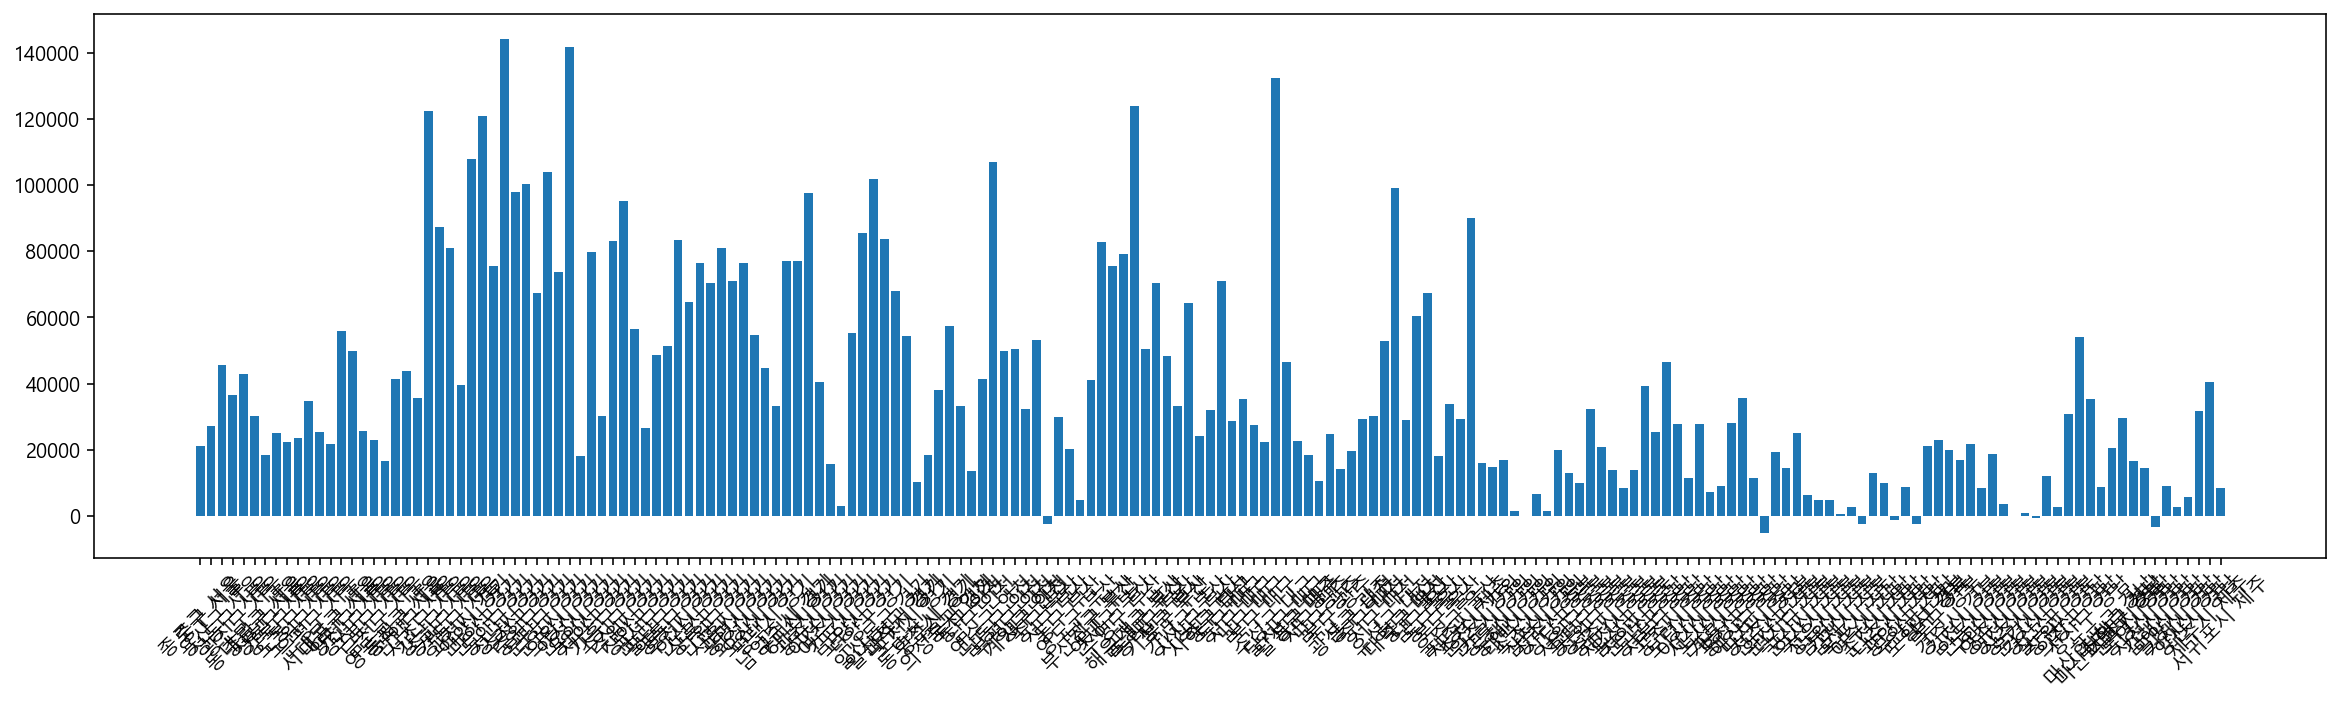

In [149]:
# 차트 그리기
plt.figure(figsize=(20,5))
plt.bar(apart2['구군']+' '+apart2['시도'], apart2['증가액'])
plt.xticks(rotation=45)

plt.show()



#대부분 아파트 매매가가 증가하였으나, 감소된 지역도 존재한다.

**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [113]:
# 가격 변동 TOP 25
tmp = apart2.sort_values('증가액', ascending=False).head(25)
tmp.reset_index(drop=True, inplace=True)
tmp
# 확인


,시도,구군,증가액,증가율(%)
0,경기,동안구,144265,25.019033
1,경기,의왕시,141787,28.618515
2,대구,수성구,132345,25.655664
3,부산,해운대구,123977,30.789194
4,서울,서초구,122376,6.988865
5,경기,안양시,120878,22.304477
6,경기,과천시,108063,8.575013
7,인천,연수구,107033,23.328647
8,경기,분당구,104115,11.234421
9,경기,덕양구,101934,26.441543


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

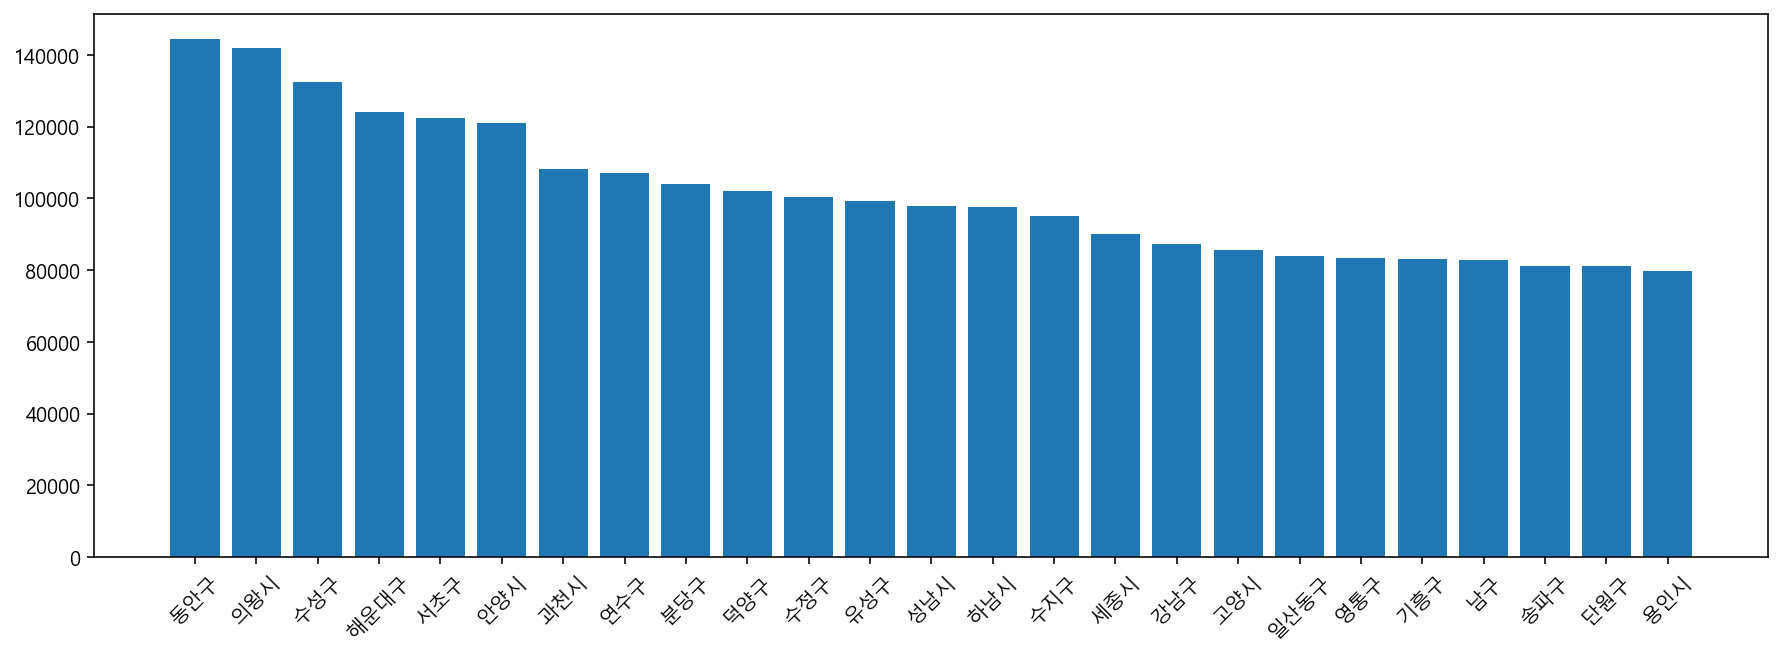

In [114]:
# 차트 그리기
plt.figure(figsize=(15,5))
plt.bar(tmp['구군'], tmp['증가액'])

plt.xticks(rotation=45)
plt.show()

# 아파트 매매가가 많이 오른 지역은 대부분 수도권이다.
# 가장 높은 지역은 동안구로 안양시에 위치해있다.

**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [115]:
# 가격 변동 BOTTOM 25
tmp = apart2.sort_values('증가액', ascending=True).head(25)
tmp
# 확인


,시도,구군,증가액,증가율(%)
144,충남,당진시,-5264,-3.192857
180,경남,사천시,-3527,-2.785500
78,부산,중구,-2645,-1.795253
158,전남,무안군,-2588,-1.326411
153,전남,목포시,-2396,-1.624021
156,전남,나주시,-1188,-0.714629
169,경북,문경시,-550,-0.389381
167,경북,영천시,-93,-0.091874
122,강원,태백시,-42,-0.053589
151,전북,남원시,486,0.345330


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

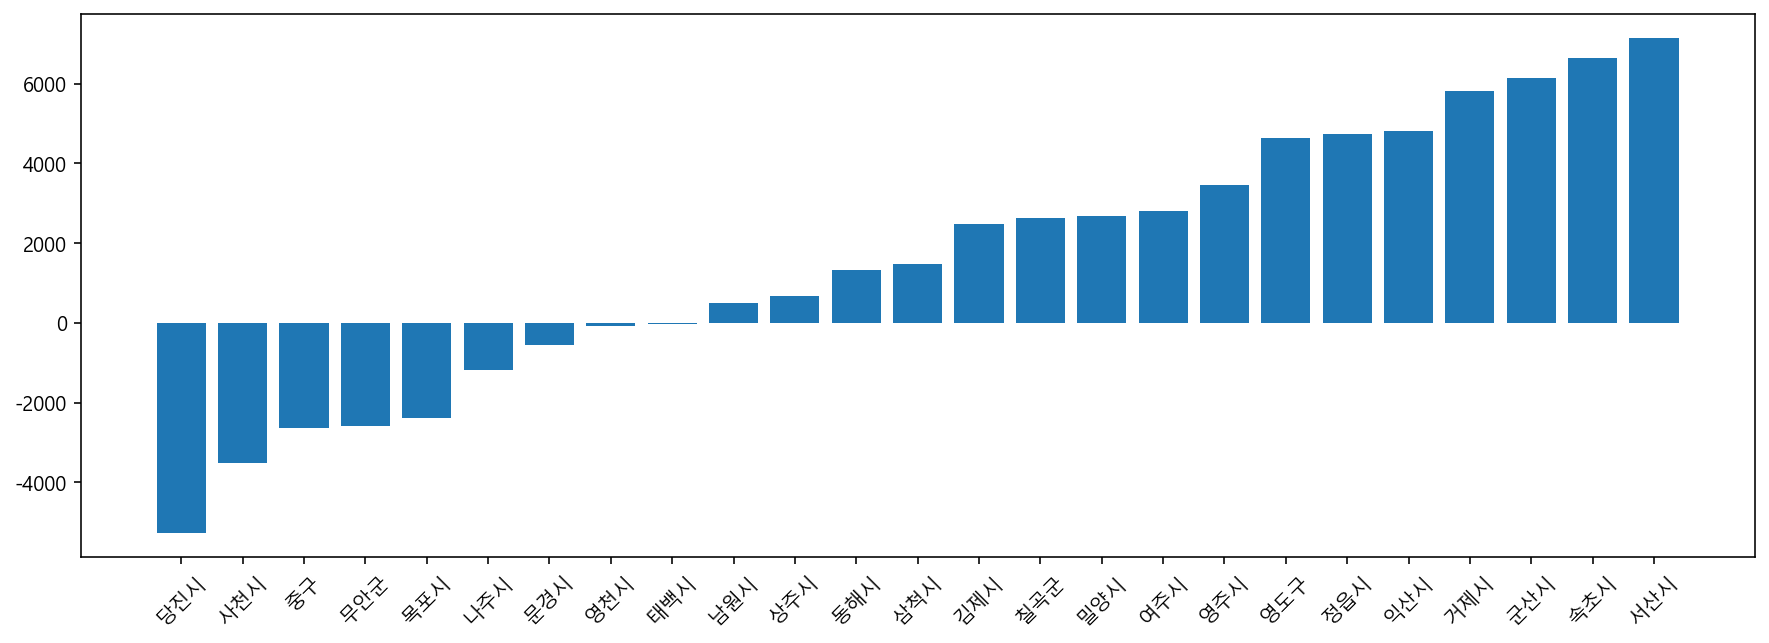

In [116]:
# 차트 그리기
plt.figure(figsize=(15,5))
plt.bar(tmp['구군'], tmp['증가액'])

plt.xticks(rotation=45)
plt.show()


# 매매가 증가액이 마이너스가 존재 - 전라도 & 경상도
# 하위 25위의 지역은 대부분 지방

### 4.2.ㅇㅇ 지역 분석

**1) ㅇㅇ 지역 데이터 추출**

- apart2 데이터프레임에서 ㅇㅇ지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [117]:
# 데이터프레임 만들기
tmp2 = apart2[apart2['시도'] == '경기']
tmp2
# 확인


,시도,구군,증가액,증가율(%)
25,경기,과천시,108063,8.575013
26,경기,안양시,120878,22.304477
27,경기,만안구,75625,15.926283
28,경기,동안구,144265,25.019033
29,경기,성남시,97866,11.557457
30,경기,수정구,100357,11.162002
31,경기,중원구,67265,15.477878
32,경기,분당구,104115,11.234421
33,경기,군포시,73705,18.591810
34,경기,의왕시,141787,28.618515


**2) ㅇㅇ 지역 가격 변동 현황**

- ㅇㅇ 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

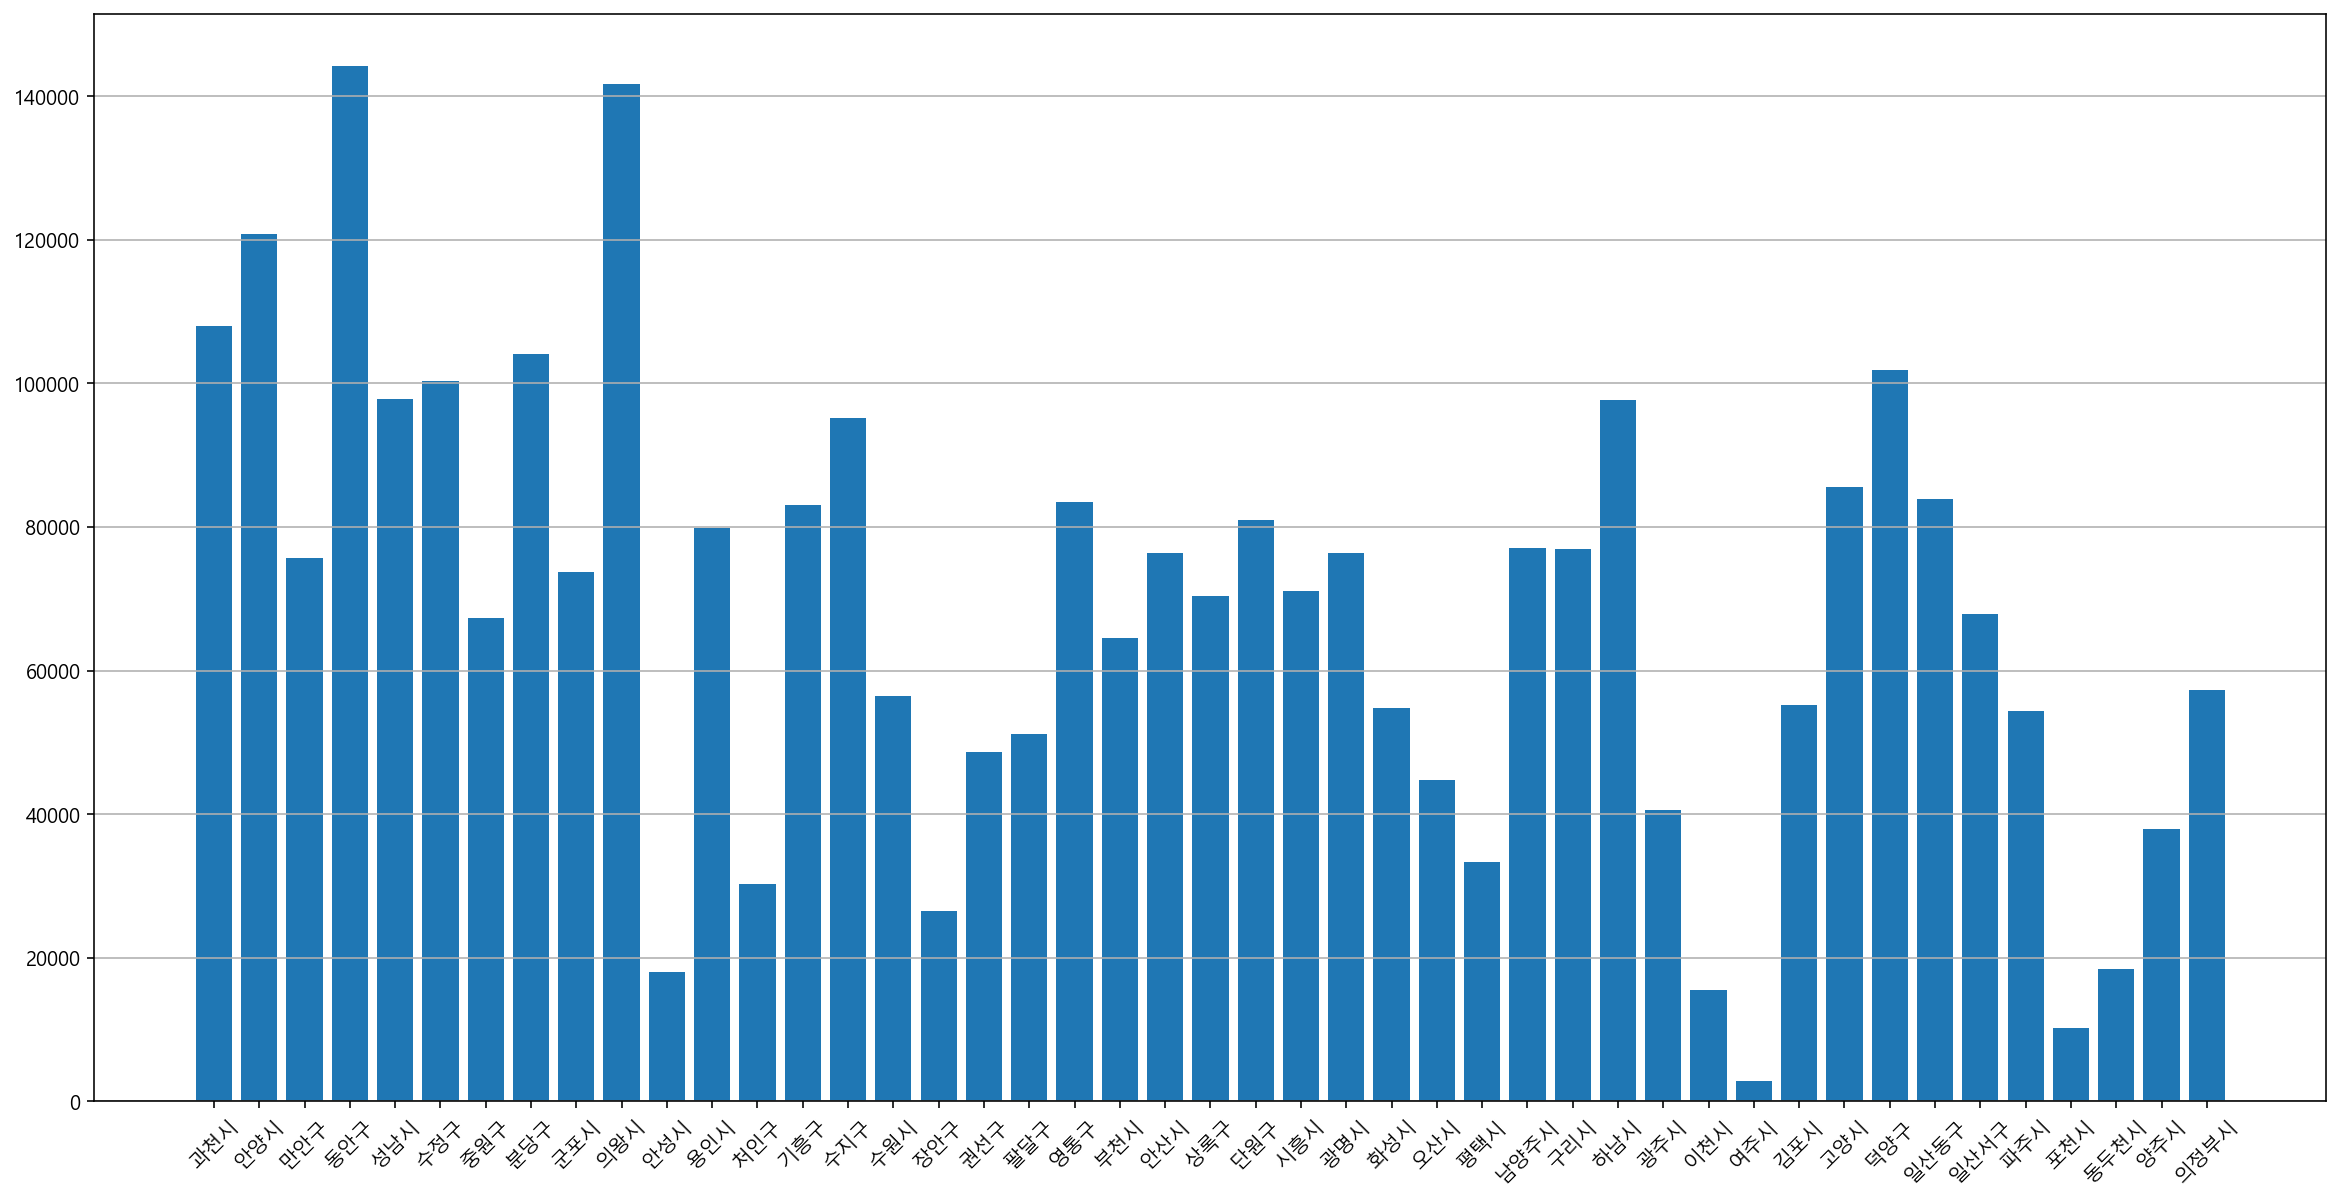

In [118]:
# ㅇㅇ 지역 가격 변동
plt.figure(figsize=(20,10))
plt.bar(tmp2['구군'], tmp2['증가액'])

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


**3) ㅇㅇ 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

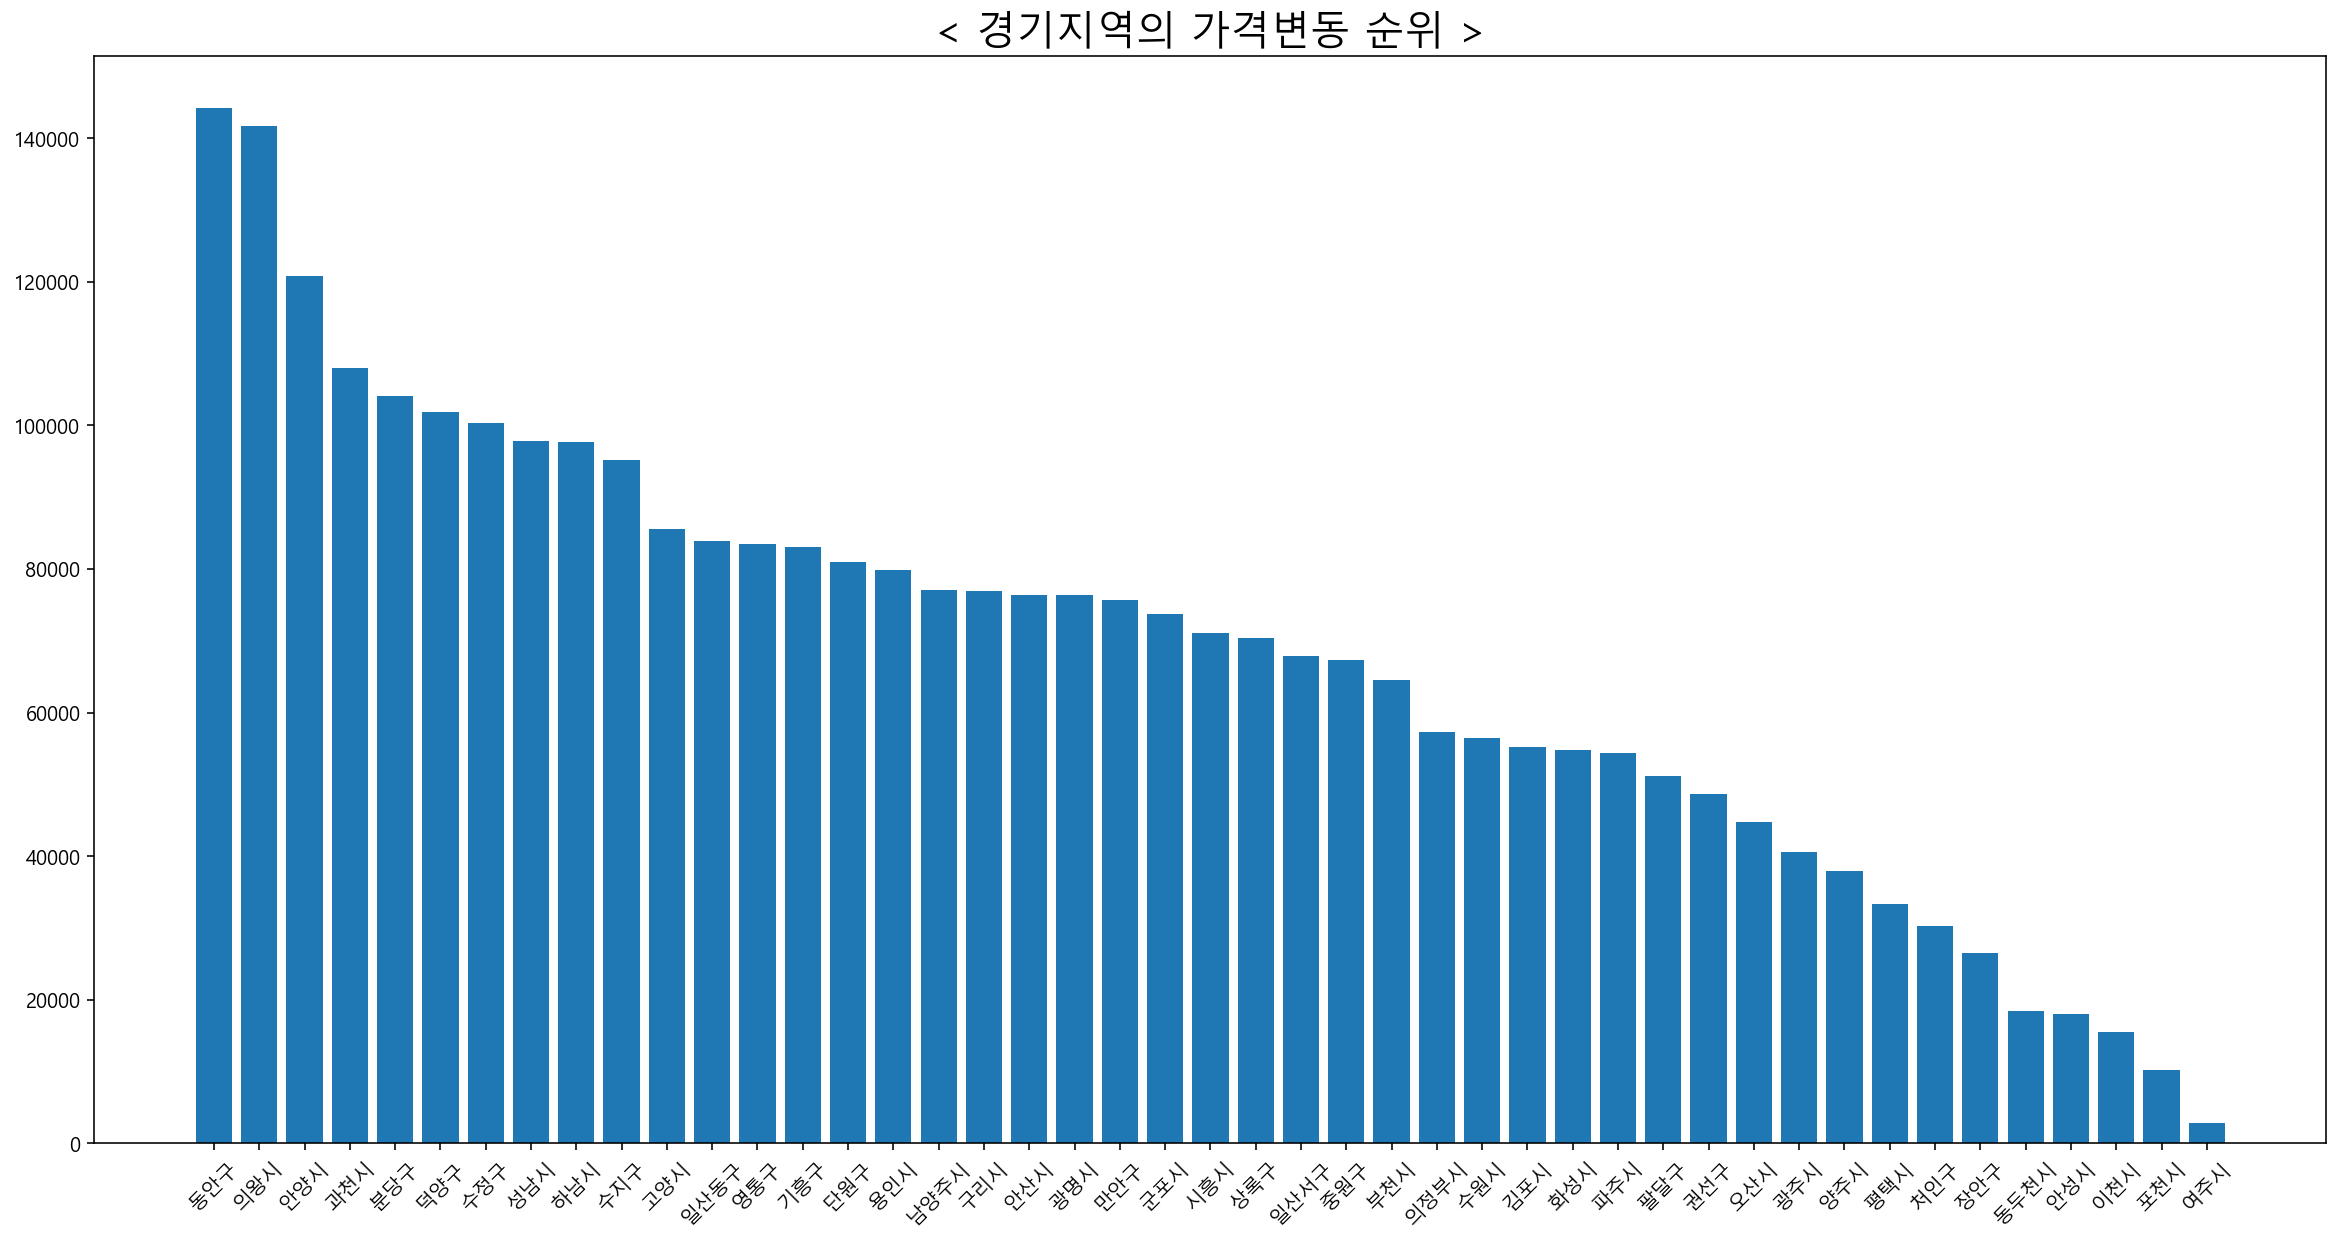

In [119]:
# ㅇㅇ 지역 가격 변동 순위
tmp2 = tmp2.sort_values('증가액', ascending=False)
tmp2
# 시각화
plt.figure(figsize=(20,10))
plt.bar(tmp2['구군'], tmp2['증가액'])

plt.title('< 경기지역의 가격변동 순위 >', fontsize=20)
plt.xticks(rotation=45)
plt.show()

#경기지역에서 증가액이 가장 높은 지역은 안양시의 동안구이다.
# 가장 낮은 지역은 여주시이다.

#### 추가
 - 증가율비교

In [120]:
tmp3 = apart2.groupby('시도', as_index=False)[['증가액']].sum()
tmp3_top = tmp3.sort_values('증가액', ascending=False)
tmp3_top.reset_index(drop=True, inplace=True)
tmp3_top

,시도,증가액
0,경기,3062169
1,서울,996653
2,부산,777604
3,대구,385897
4,인천,381090
5,충남,263899
6,경남,255638
7,대전,240430
8,울산,208727
9,경북,147696


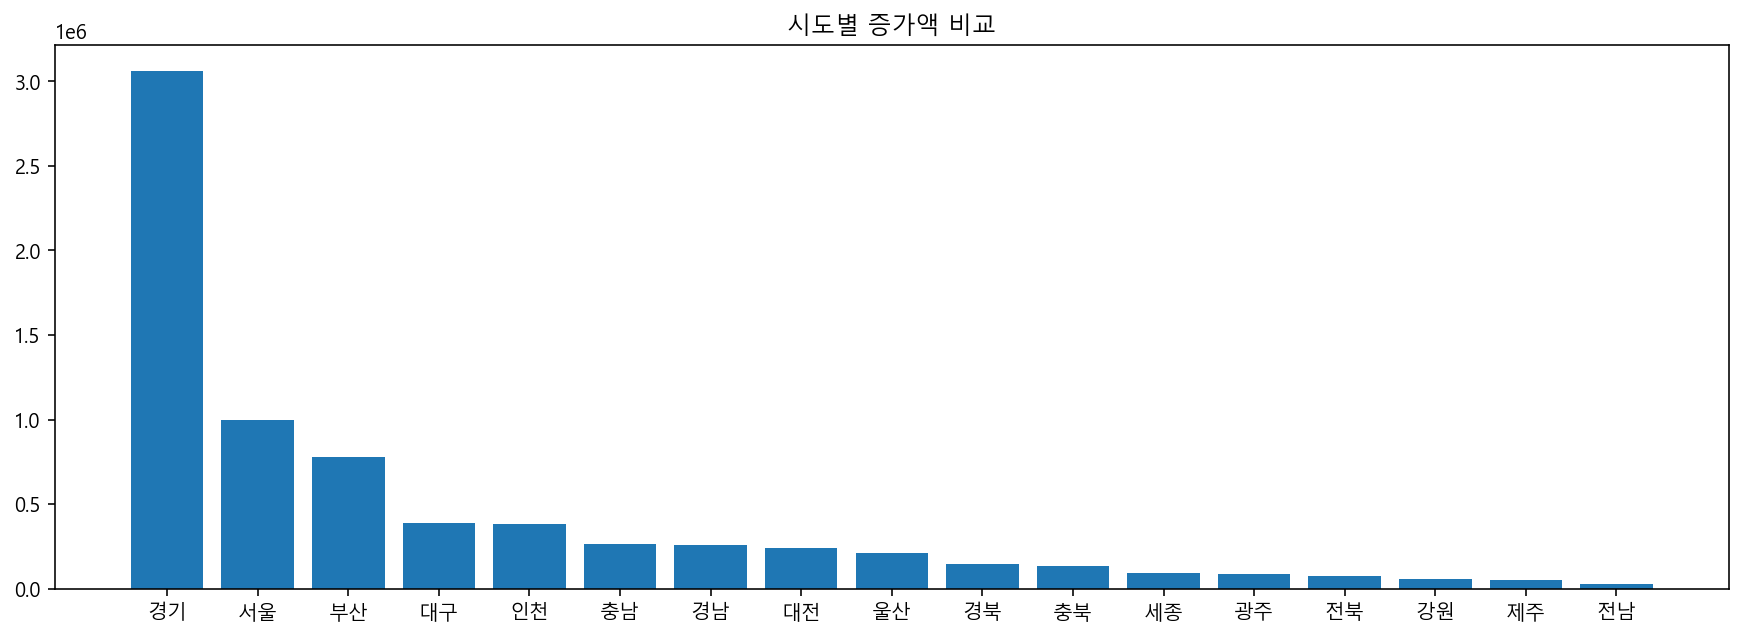

In [121]:
plt.figure(figsize=(15,5))
plt.bar(tmp3_top['시도'], tmp3_top['증가액'])

plt.title('시도별 증가액 비교')
plt.show()

#시도별 증가액을 비교했을 때, 경기지역이 압도적으로 높다.
#지방은 부산, 대구, 충남, 경남, 대전 .. 순이다.

In [129]:
tmp4 = apart2.sort_values('증가율(%)', ascending=False)
tmp4.reset_index(drop=True, inplace=True)
tmp4_top = tmp4.head(10)
tmp4_top

,시도,구군,증가액,증가율(%)
0,부산,해운대구,123977,30.789194
1,경기,의왕시,141787,28.618515
2,경기,덕양구,101934,26.441543
3,대구,수성구,132345,25.655664
4,경기,단원구,81010,25.371442
5,경기,시흥시,71132,25.349513
6,경기,안산시,76376,25.107414
7,경기,동안구,144265,25.019033
8,경기,상록구,70329,24.721167
9,충남,홍성군,35511,23.855461


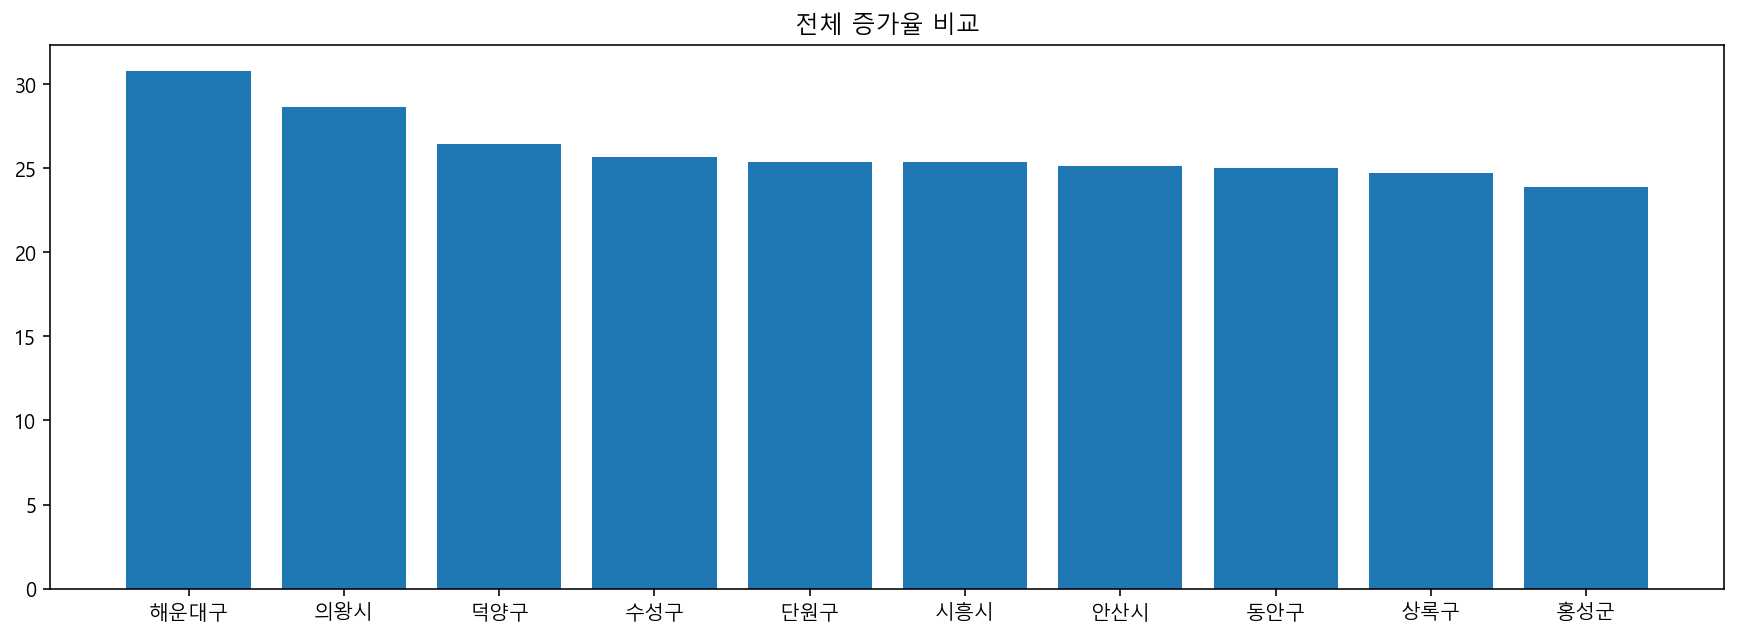

In [128]:
plt.figure(figsize=(15,5))
plt.bar(tmp4_top['구군'], tmp4_top['증가율(%)'])

plt.title('전체 증가율 비교')
plt.show()

#해운대구의 증가율이 가장 높았고, 경기지역이 대부분을 차지하였다.

In [136]:
tmp5 = apart2[apart2['시도'] == '서울']
tmp5_top = tmp5.sort_values('증가액', ascending=False).head(10)
tmp5_top.reset_index(drop=True, inplace=True)
tmp5_top

,시도,구군,증가액,증가율(%)
0,서울,서초구,122376,6.988865
1,서울,강남구,87274,5.040291
2,서울,송파구,81143,6.435640
3,서울,마포구,55788,5.584597
4,서울,양천구,49836,5.632141
5,서울,용산구,45719,3.267150
6,서울,동작구,43885,5.195680
7,서울,광진구,42768,4.188683
8,서울,영등포구,41415,5.079850
9,서울,강동구,39687,4.984871


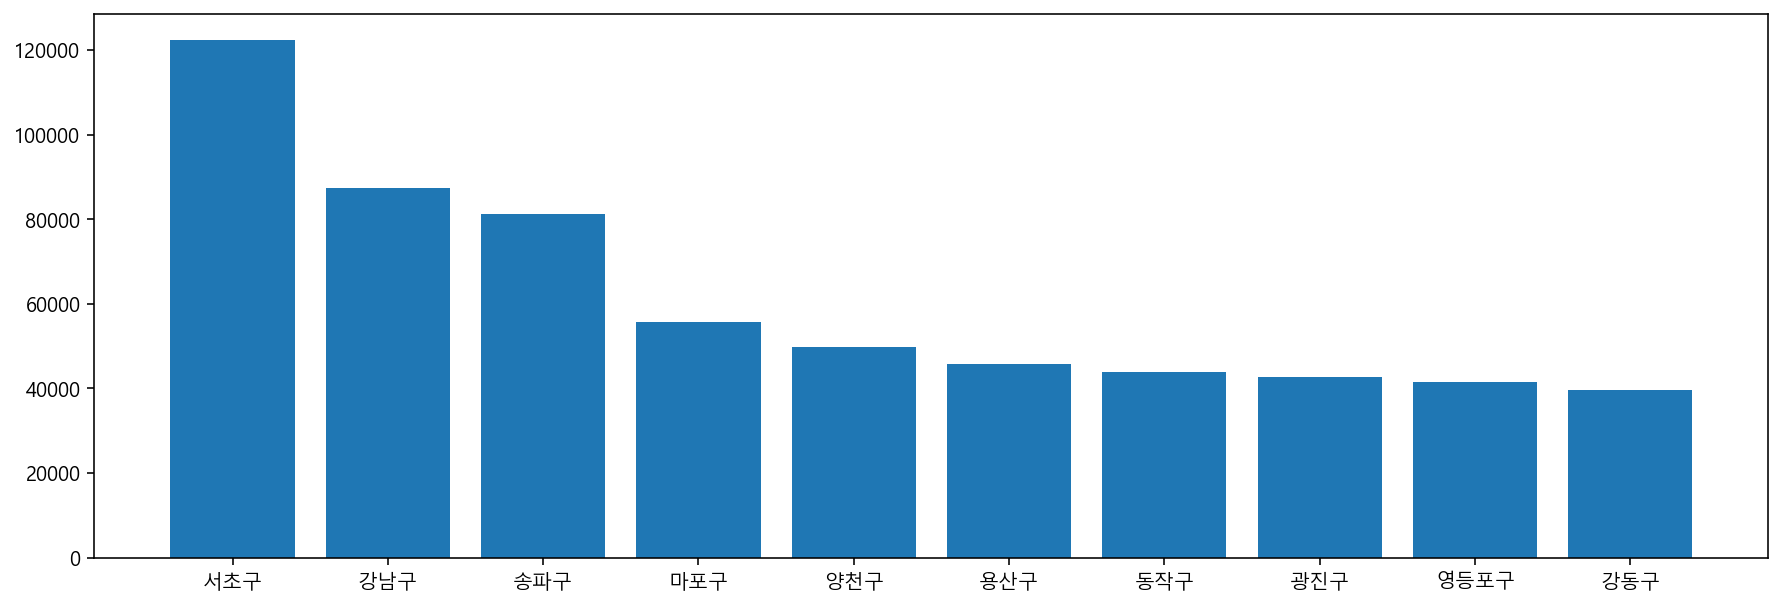

In [138]:
plt.figure(figsize=(15,5))
plt.bar(tmp5_top['구군'], tmp5_top['증가액'])

plt.show()

In [143]:
tmp6_top = tmp5.sort_values('증가율(%)', ascending=False).head(10)
tmp6_top

,시도,구군,증가액,증가율(%)
10,서울,노원구,34828,7.254534
21,서울,서초구,122376,6.988865
20,서울,관악구,35652,6.814272
23,서울,송파구,81143,6.435640
14,서울,양천구,49836,5.632141
13,서울,마포구,55788,5.584597
9,서울,도봉구,23500,5.434091
19,서울,동작구,43885,5.195680
18,서울,영등포구,41415,5.079850
22,서울,강남구,87274,5.040291


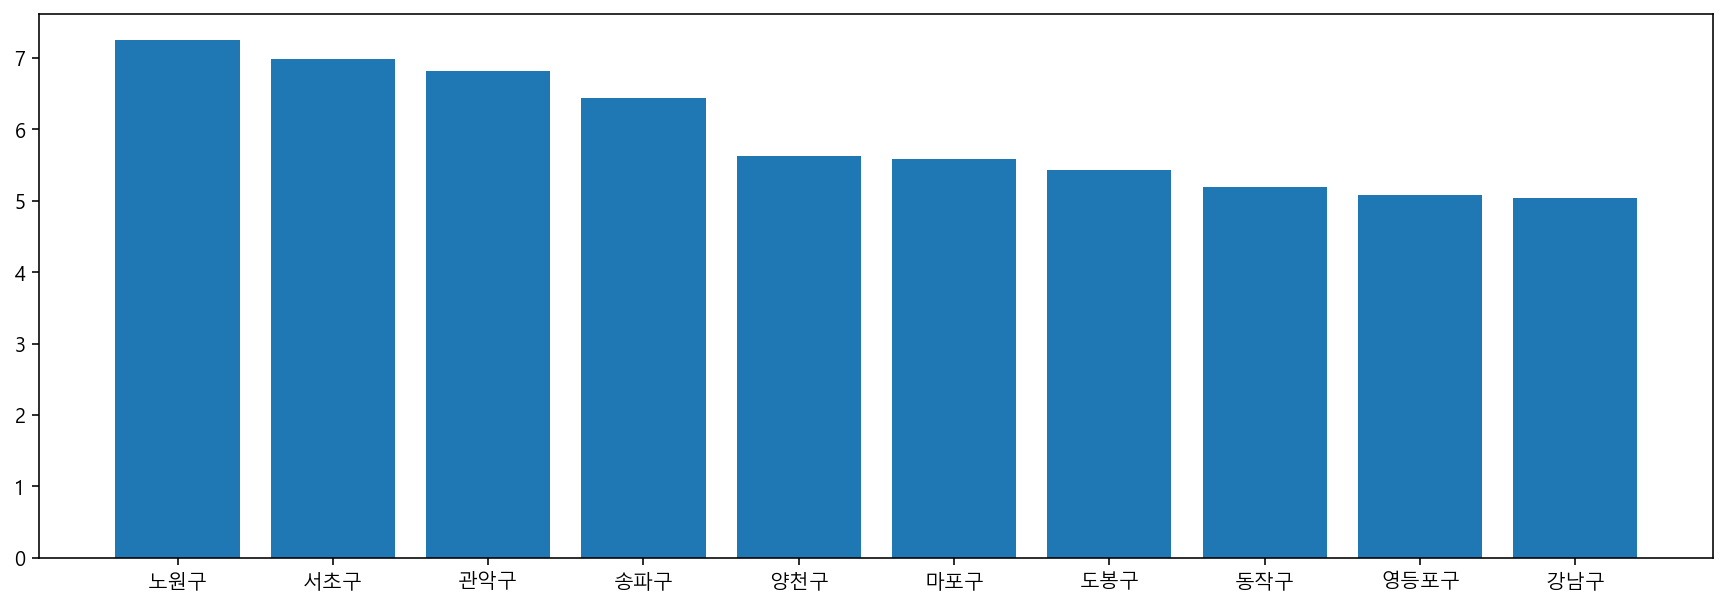

In [146]:
plt.figure(figsize=(15,5))
plt.bar(tmp6_top['구군'], tmp6_top['증가율(%)'])

plt.show()

In [148]:
a1 = apart2['증가율(%)'] >= 5
apart2[a1]

,시도,구군,증가액,증가율(%)
9,서울,도봉구,23500,5.434091
10,서울,노원구,34828,7.254534
13,서울,마포구,55788,5.584597
14,서울,양천구,49836,5.632141
18,서울,영등포구,41415,5.079850
...,...,...,...,...
178,경남,진주시,16589,8.981446
179,경남,통영시,14526,9.723217
181,경남,김해시,8924,5.434505
184,경남,양산시,31641,18.334743


## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 최근 매매가에 증가만 있을줄 알았지만, 감소도 있는 것을 확인하였다. 
- 감소지역은 대부분 지방이다.
- 경기지역에서 증가액이 가장 높은 지역은 안양시의 동안구이다. 가장 낮은 지역은 여주시이다.
- 시도별 증가액을 비교했을 때, 경기지역이 압도적으로 높다.


- 증가율을 비교해보았을 때, 부산이 가장 높은 증가율을 보였고, 대부분 경기지역이 높은 증가율을 차지하였다.
- 서울시에서 증가액이 가장 높은 구는 서초구이다. 이어서 강남구, 송파구이다.
- 서울시에서 증가율이 가장 높은 구는 노원구이다.
- 증가율이 5% 이상인 지역은 총 146이다.


- **전체적으로 증가액을 비교하였을 때, 수도권 지역을 중심으로 증가액이 높다.**

**2) 기타**

- 매매가 비교로 어떤 결과를 내야할지 고민이 된다.
- 
- 
- 
- 
